# Curso de Capacitación en Python para Data Science - Sesión 3

<img src='https://www.danielsaromo.xyz/assets/img/logo-pucp.png' width=200px>


BSc. Stev Huamán (mhuamanr@pucp.edu.pe)

<font color='#33FFEE'> Desafío 2: Visualizacion de datos usando matplotlib y seaborn en data tabular y geoespacial.</font>

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio2_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

# Uber Dataset Perú

Este conjunto de datos proviene de una startup de movilidad que permite a cualquier usuario reservar un viaje desde cualquier punto A hasta cualquier punto B dentro de la ciudad utilizando un teléfono inteligente. El valor del viaje se calcula automáticamente en el momento de la solicitud mediante la aplicación, teniendo en cuenta la distancia, el tiempo de viaje estimado y la disponibilidad actual de vehículos (equilibrio entre la demanda y la oferta).

Una vez que el viaje termina, cargamos la tarjeta de crédito del pasajero y transferimos X% de este valor a la cuenta bancaria del conductor. Finalmente, antes de que el pasajero sea recogido, el viaje puede ser cancelado tanto por el conductor como por el pasajero.

Un análisis descriptivo de los datos podría incluir:

- ¿Cuántos? (por ejemplo, vehículos, pasajeros, conductores).
- ¿Cuándo? (por ejemplo, viajes/precio/costo por período de tiempo, ¿son los viajes rápidos?).
- ¿Qué? (por ejemplo, reservas/inmediatas, tipo de vehículo).
- ¿Quiénes? (por ejemplo, peores pasajeros, mejores conductores).
- Cualquier pregunta que consideres interesante.

## Análisis Inicial del Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_columns = 300

In [ ]:
#data = pd.read_csv('uber_peru_2010.csv', sep=';')
data = pd.read_csv('https://raw.githubusercontent.com/CristhianCastro25/Programacion_Analisis_Exploratorio/main/uber_peru_2010.csv', sep=';')

In [ ]:
data.head(5)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,16/11/2010 16:44,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:34,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31/05/2010 5:01,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01/06/2010 0:29,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,11/09/2010 23:55,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


1. Indicar el tamaño del dataframe, cantidad de filas y de columnas ( 1 punto)

Visualizamos los primeros 5 elementos del dataframe

Para poder visualizar todas las columnas:

In [ ]:
pd.set_option('display.max_columns', None)

2. Indica la cantidad y proporción de valores nulos por cada columna.  ( 2 puntos)
 - ¿Qué conclusiones o qué tratamiento le podemos dar a los datos faltantes?
 - Los datos faltan por error de lectura o por alguna otra razón?

In [ ]:
len(data)

23111

In [ ]:
# Journey_id corresponde a un id único de cada viaje. Entonces la cantidad única de journey_id corresponde al total de filas del dataset.
data['journey_id'].nunique()

23111

In [ ]:
# Existen 1390 usuarios distintos
data['user_id'].nunique()

1390

In [ ]:
# Y 168 drivers
data['driver_id'].nunique()

168

## Análisis Univariado

In [ ]:
for columna in data.columns:
    conteo_valores_unicos = data[columna].nunique()
    print(f"Columna '{columna}': {conteo_valores_unicos} valores únicos")

Columna 'journey_id': 23111 valores únicos
Columna 'user_id': 1390 valores únicos
Columna 'driver_id': 168 valores únicos
Columna 'taxi_id': 213 valores únicos
Columna 'icon': 3 valores únicos
Columna 'start_type': 3 valores únicos
Columna 'start_at': 20987 valores únicos
Columna 'start_lat': 11753 valores únicos
Columna 'start_lon': 8489 valores únicos
Columna 'end_at': 21780 valores únicos
Columna 'end_lat': 12266 valores únicos
Columna 'end_lon': 9084 valores únicos
Columna 'end_state': 6 valores únicos
Columna 'driver_start_lat': 18425 valores únicos
Columna 'driver_start_lon': 18314 valores únicos
Columna 'arrived_at': 17156 valores únicos
Columna 'currency': 1 valores únicos
Columna 'price': 5456 valores únicos
Columna 'price_distance': 5778 valores únicos
Columna 'price_duration': 2676 valores únicos
Columna 'distance': 8392 valores únicos
Columna 'duration': 2958 valores únicos
Columna 'cost': 4098 valores únicos
Columna 'cost_distance': 4625 valores únicos
Columna 'cost_durati

In [ ]:
data.nunique()

journey_id          23111
user_id              1390
driver_id             168
taxi_id               213
icon                    3
start_type              3
start_at            20987
start_lat           11753
start_lon            8489
end_at              21780
end_lat             12266
end_lon              9084
end_state               6
driver_start_lat    18425
driver_start_lon    18314
arrived_at          17156
currency                1
price                5456
price_distance       5778
price_duration       2676
distance             8392
duration             2958
cost                 4098
cost_distance        4625
cost_duration        2060
source                  5
driver_score            6
rider_score             6
dtype: int64

In [ ]:
# Obtener y almacenar la cantidad única de valores por cada columna
conteo_valores_unicos = data.nunique().reset_index()
conteo_valores_unicos.columns = ['Columna', 'Unique_values']

# Mostrar el DataFrame con el conteo de valores únicos
conteo_valores_unicos.sort_values('Unique_values')

,Columna,Unique_values
16,currency,1
4,icon,3
5,start_type,3
25,source,5
27,rider_score,6
12,end_state,6
26,driver_score,6
2,driver_id,168
3,taxi_id,213
1,user_id,1390


In [ ]:
# Creamos una lista con todas las variables categóricas
var_cat = ['icon','start_type','source','rider_score','end_state','driver_score']

In [ ]:
data['start_type'].value_counts()

asap        14865
reserved     8226
delayed        20
Name: start_type, dtype: int64

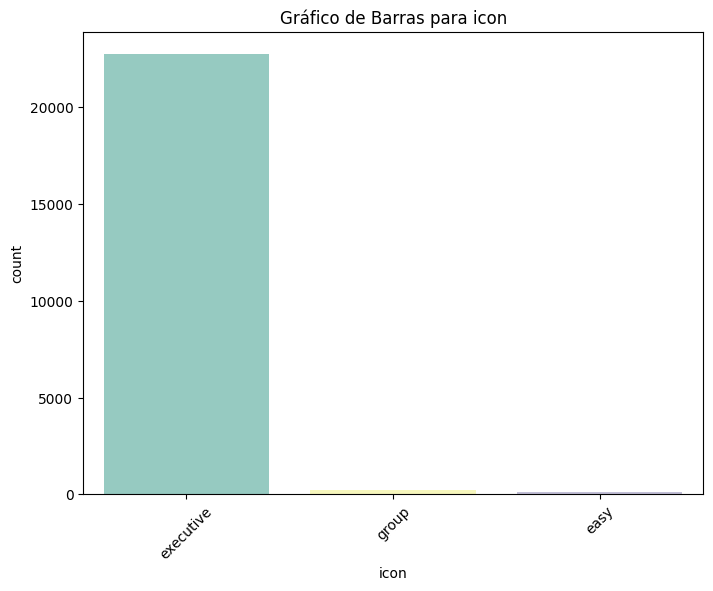

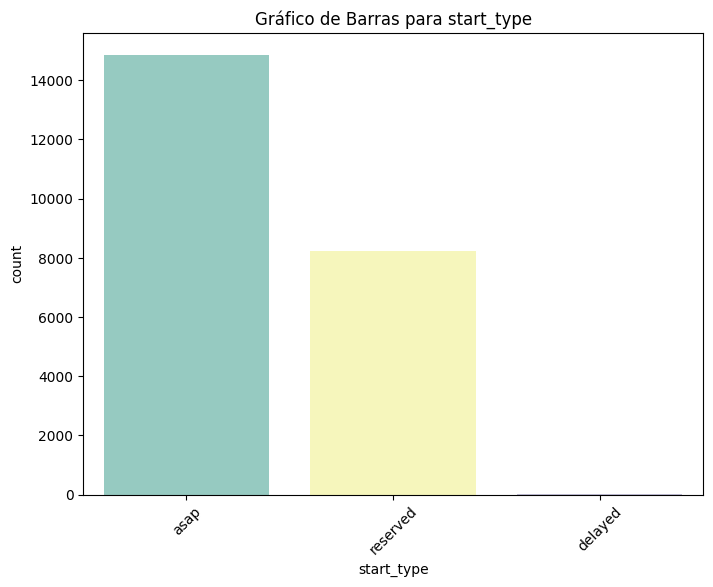

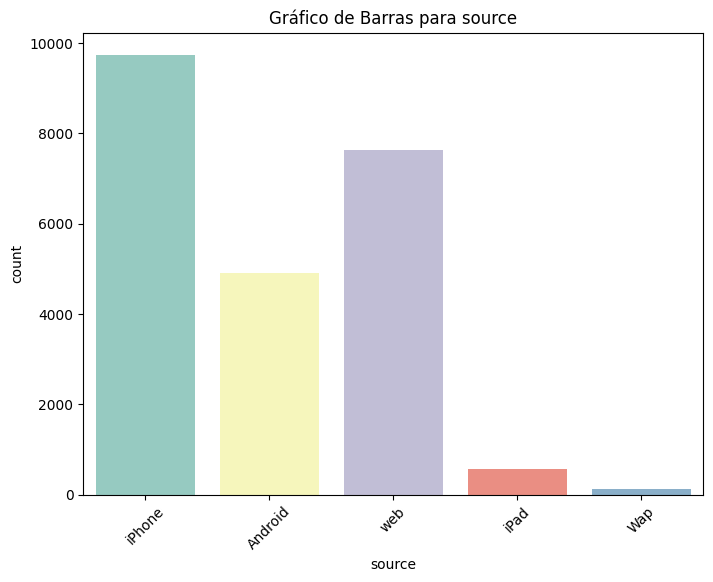

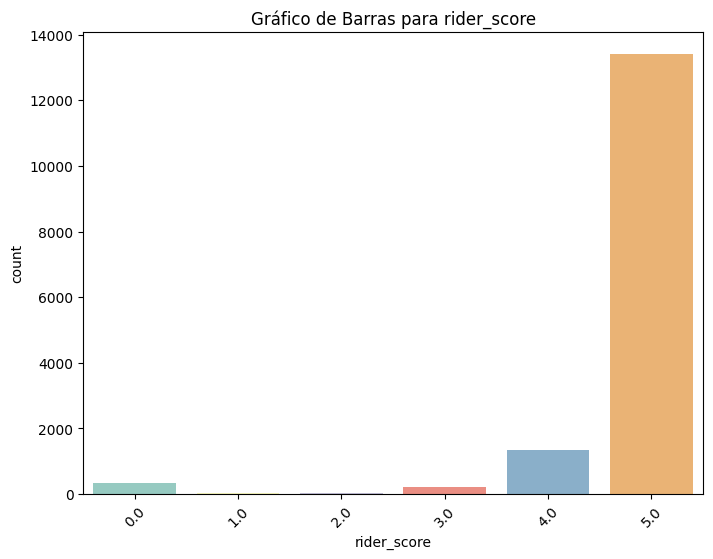

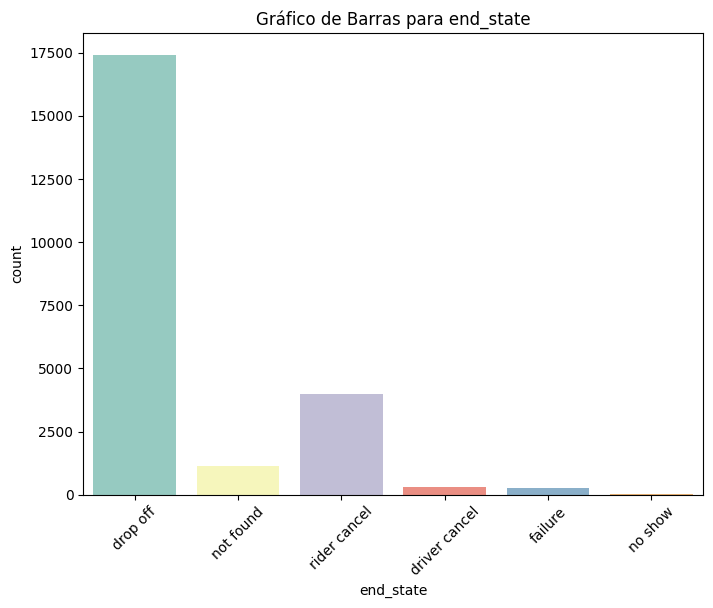

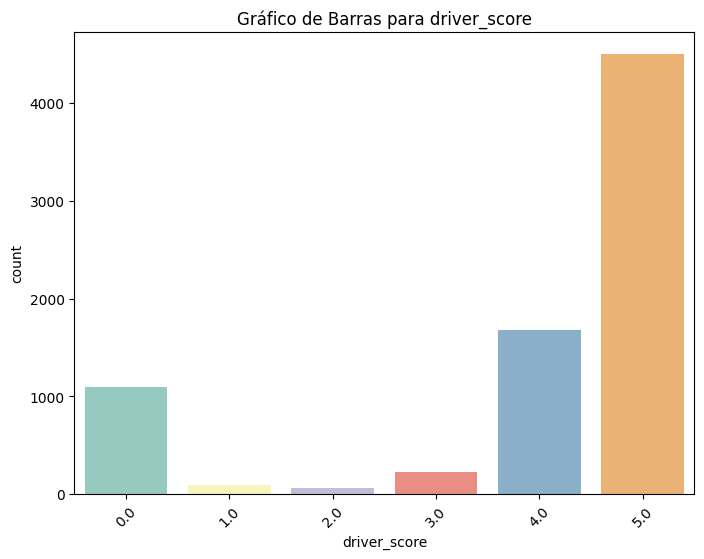

In [ ]:
# Generar un gráfico de barras para cada variable categórica
for columna in var_cat:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=columna, palette="Set3")  # Puedes cambiar la paleta de colores si lo deseas
    plt.title(f'Gráfico de Barras para {columna}')
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
    plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        23111 non-null  object 
 1   user_id           23111 non-null  object 
 2   driver_id         19726 non-null  object 
 3   taxi_id           19726 non-null  object 
 4   icon              23111 non-null  object 
 5   start_type        23111 non-null  object 
 6   start_at          23111 non-null  object 
 7   start_lat         23111 non-null  object 
 8   start_lon         23111 non-null  object 
 9   end_at            22835 non-null  object 
 10  end_lat           23111 non-null  object 
 11  end_lon           23111 non-null  object 
 12  end_state         23099 non-null  object 
 13  driver_start_lat  19621 non-null  object 
 14  driver_start_lon  19621 non-null  object 
 15  arrived_at        17716 non-null  object 
 16  currency          23111 non-null  object

3. Realizar un análisis univariado de las columnas que considere relevante . Incluya los tipos de gráficos que considere apropiados y comente sus resultados (3 puntos)

In [ ]:
# Escribir código

El campo **start_at** es object, sin emabrgo indica la fecha y hora donde fue tomado el taxi. Podemos convertir a tipo de dato datetime de pandas usando:

In [ ]:
data['start_at'] = pd.to_datetime(data['start_at'], format="%d/%m/%Y %H:%M")

In [ ]:
data.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  object        
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

Podemos crear distintos atributos usando el campo start_at:

In [ ]:
data['mes'] = data['start_at'].dt.month
data['year'] = data['start_at'].dt.year
data['date'] = data['start_at'].dt.date
data['hour'] = data['start_at'].dt.hour

data['MonthDayNum'] = data['start_at'].dt.day
data['DayOfWeek'] = data['start_at'].dt.day_name()
data['DayOfWeek_i'] = data['start_at'].dt.weekday

In [ ]:
data

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,11,2010,2010-11-16,16,16,Tuesday,1
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,5,2010,2010-05-31,5,31,Monday,0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,9,2010,2010-09-11,23,11,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",31/07/2010 13:27,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",31/07/2010 13:15,PEN,1700.0,509.0,337.0,1590.0,404.0,0.0,NaN,NaN,iPhone,5.0,5.0,7,2010,2010-07-31,13,31,Saturday,5
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",02/10/2010 5:56,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",02/10/2010 5:39,PEN,1923.0,1923.0,0.0,6010.0,0.0,188500.0,1346.0,0.0,Android,NaN,5.0,10,2010,2010-10-02,5,2,Saturday,5
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",21/09/2010 10:18,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",21/09/2010 10:05,PEN,1700.0,1478.0,109.0,4620.0,131.0,1450.0,1109.0,81.0,Android,0.0,0.0,9,2010,2010-09-21,9,21,Tuesday,1
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",29/04/2010 5:11,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",29/04/2010 4:23,PEN,4962.0,4427.0,535.0,13835.0,641.0,3473.0,3099.0,374.0,Android,NaN,5.0,4,2010,2010-04-29,4,29,Thursday,3


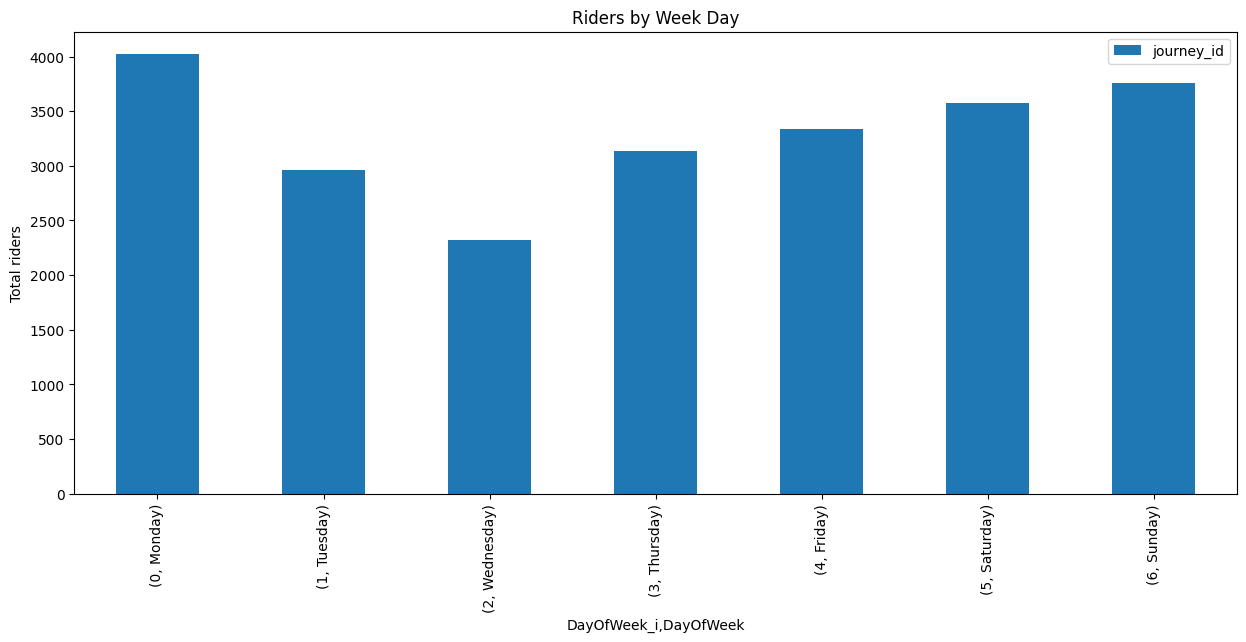

In [ ]:
# Visualicemos la cantidad total de viajes por día de semana.
uber2010_weekdays = data.pivot_table(index=['DayOfWeek_i','DayOfWeek'],
                                  values='journey_id',
                                  aggfunc='count')
uber2010_weekdays.plot(kind='bar', figsize=(15,6))
plt.ylabel('Total riders')
#plt.set_xticklabels(x_labels)
plt.title('Riders by Week Day');

4. Mostrar gráficos de barras o líneas para identificar patrones de viajes. ( 6 puntos)
- Los viajes son más frecuentes los fines de semana o durante la semana?
- ¿Cómo es la tendencia mes a mes? A qué se debe esto?
- ¿Cómo varía la distribución a lo largo del día? Existen diferencias entre los distintos tipos de viajes?
- ¿Si hacemos un gráfico diario existen patrones o comportamientos interesantes en algunos días en particular?

<Axes: xlabel='date'>

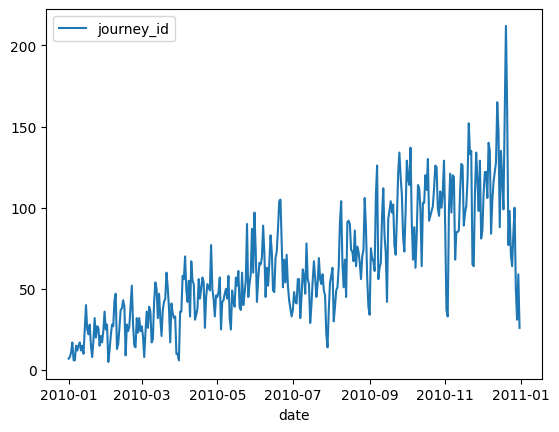

In [ ]:
data.groupby('date').agg({'journey_id':'count'}).plot()

## Análisis Geo Espacial

In [ ]:
import geopandas as gpd

In [ ]:
# Convertimos nuestro dataframe a un GeoDataframe en pandas
data.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,11,2010,2010-11-16,16,16,Tuesday,1
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",01/06/2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",31/05/2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,5,2010,2010-05-31,5,31,Monday,0
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",01/06/2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,PEN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,iPhone,NaN,NaN,6,2010,2010-06-01,0,1,Tuesday,1
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",12/09/2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11/09/2010 23:50,PEN,8227.0,7665.0,562.0,30270.0,715.0,6173.0,5756.0,417.0,iPhone,4.0,5.0,9,2010,2010-09-11,23,11,Saturday,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  object        
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

In [ ]:
# Tomaremos como referencia la ubicación en donde fue tomado el taxi: start_lat , start_lon. Antes debemos convertir a número
data[['start_lat','start_lon']]

,start_lat,start_lon
0,"-12,13983536","-77,02355957"
1,"-12,13874817","-76,99536133"
2,"-12,12453079","-77,02780151"
3,"-12,13885117","-76,99530029"
4,"-12,08995438","-76,92626953"
...,...,...
23106,"-12,08974075","-77,04699707"
23107,"-12,09253011","-77,02875271"
23108,"-12,1275637","-77,02642288"
23109,"-12,019468","-77,1077669"


In [ ]:
data[['start_lat','start_lon']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   start_lat  23111 non-null  object
 1   start_lon  23111 non-null  object
dtypes: object(2)
memory usage: 361.2+ KB


In [ ]:
data['latitude'] = data['start_lat'].str.replace(',','.')
data['longitude'] = data['start_lon'].str.replace(',','.')

In [ ]:
data['latitude'] = data['latitude'].astype('float')
data['longitude'] = data['longitude'].astype('float')

In [ ]:
data[['latitude','longitude']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   23111 non-null  float64
 1   longitude  23111 non-null  float64
dtypes: float64(2)
memory usage: 361.2 KB


In [ ]:
data_geo = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude), crs="EPSG:4326"
)

In [ ]:
type(data_geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Leemos información de los distritos
lima_dis = gpd.read_file('https://raw.githubusercontent.com/joseluisq/peru-geojson-datasets/master/lima_callao_distritos.geojson')

In [ ]:
lima_dis.head()

,id,departamento,provincia,distrito,institucion,distrito2,geometry
0,2,LIMA,LIMA,SAN BORJA,IGN,San Borja,"MULTIPOLYGON (((-76.98587 -12.08173, -76.98585..."
1,6,LIMA,LIMA,JESUS MARIA,IGN,None,"MULTIPOLYGON (((-77.04242 -12.08297, -77.04311..."
2,7,LIMA,LIMA,PACHACAMAC,IGN,None,"MULTIPOLYGON (((-76.87588 -12.07350, -76.87582..."
3,10,LIMA,LIMA,SAN LUIS,IGN,None,"MULTIPOLYGON (((-76.99780 -12.06084, -76.99810..."
4,12,LIMA,LIMA,LA MOLINA,IGN,None,"MULTIPOLYGON (((-76.94139 -12.06207, -76.94137..."


In [ ]:
# Join espacial para agregar información de distritos:
data_geo_dis = data_geo.sjoin(lima_dis[['provincia','distrito','geometry']])

In [ ]:
data_geo_dis

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,currency,price,price_distance,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,mes,year,date,hour,MonthDayNum,DayOfWeek,DayOfWeek_i,latitude,longitude,geometry,index_right,provincia,distrito
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",16/11/2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16/11/2010 17:02,PEN,3821.0,3626.0,195.0,11331.0,234.0,0.0,0.0,0.0,iPhone,5.0,5.0,11,2010,2010-11-16,16,16,Tuesday,1,-12.139835,-77.023560,POINT (-77.02356 -12.13984),38,LIMA,BARRANCO
59,fdf02c2d7b2dd9c0c7eb0b0b729cc655,649d38ea6680a3f6ee4a4b734f508d9d,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,asap,2010-06-02 10:29:00,"-12,14313126","-77,01556396",02/06/2010 11:07,"-12,13913727","-76,99572754",drop off,"-12,11695433","-77,02999592",02/06/2010 10:50,PEN,1942.0,1797.0,145.0,5616.0,174.0,1700.0,1348.0,107.0,iPhone,5.0,5.0,6,2010,2010-06-02,10,2,Wednesday,2,-12.143131,-77.015564,POINT (-77.01556 -12.14313),38,LIMA,BARRANCO
108,443ccdfd1345a761a544f8cf428e3bca,761a1b1e8e4103f2ac5a425564328a45,NaN,NaN,executive,reserved,2010-10-12 06:05:00,"-12,14638901","-77,01852417",12/10/2010 5:20,"-12,10471725","-76,99841309",rider cancel,NaN,NaN,NaN,PEN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,iPhone,NaN,NaN,10,2010,2010-10-12,6,12,Tuesday,1,-12.146389,-77.018524,POINT (-77.01852 -12.14639),38,LIMA,BARRANCO
109,532278dfa8891ad6dd958337e4cc9a16,761a1b1e8e4103f2ac5a425564328a45,d04f1a596fe4a582f48e6eb2f9e8f617,d04f1a596fe4a582f48e6eb2f9e8cceb,executive,reserved,2010-10-12 06:30:00,"-12,146492","-77,01852417",12/10/2010 6:42,"-12,10716248","-76,99749756",drop off,"-12,12915486","-77,03593338",12/10/2010 6:24,PEN,2557.0,2557.0,0.0,7990.0,0.0,1918.0,1918.0,0.0,iPhone,2.0,3.0,10,2010,2010-10-12,6,12,Tuesday,1,-12.146492,-77.018524,POINT (-77.01852 -12.14649),38,LIMA,BARRANCO
152,f622a9397b85b5c9c0ef938c5d57be64,f420a3daee4777127e9eaa907eb5818e,ae06c34243f741e203e97c48ebcbd9da,f622a9397b85b5c9c0ef938c5d592020,executive,asap,2010-09-07 05:13:00,"-12,13978577","-77,02429199",07/09/2010 5:47,"-12,11179352","-77,0357666",drop off,"-12,08104022","-77,06651466",07/09/2010 5:35,PEN,1700.0,1498.0,1.0,4680.0,1.0,1450.0,1123.0,1.0,iPhone,NaN,5.0,9,2010,2010-09-07,5,7,Tuesday,1,-12.139786,-77.024292,POINT (-77.02429 -12.13979),38,LIMA,BARRANCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,d439fbb315b2966b8c84e219ecda2701,dd23cf0ef33ae44e0c0b4c756e1fe4e8,eef4aeee867d60d44e1d077d16054b6a,294e869d187357cad25b8af65aa860e8,executive,asap,2010-12-01 00:39:00,"-12,0274637","-76,99573103",01/12/2010 1:42,"-12,03134817","-77,02858239",drop off,"-12,0278311","-76,99483568",01/12/2010 0:40,PEN,5479.0,3687.0,1792.0,11523.0,2141.0,4092.0,2766.0,1326.0,Android,5.0,5.0,12,2010,2010-12-01,0,1,Wednesday,2,-12.027464,-76.995731,POINT (-76.99573 -12.02746),44,LIMA,EL AGUSTINO
16235,1d8ba0bdacccf2d0d70ee9925185bca8,2894d770d508897b1e067c5834da8d57,eef4aeee867d60d44e1d077d16054b6a,294e869d187357cad25b8af65aa860e8,executive,asap,2010-11-26 19:55:00,"-12,0296801","-76,9802825",26/11/2010 21:04,"-12,0959365","-77,0375824",drop off,"-12,09486028","-76,96214755",26/11/2010 20:24,PEN,6226.0,5928.0,298.0,19189.0,356.0,4669.0,4448.0,221.0,web,NaN,5.0,11,2010,2010-11-26,19,26,Friday,4,-12.029680,-76.980283,POINT (-76.98028 -12.02968),44,LIMA,EL AGUSTINO
17125,cd6fba80de11849ce566009f41bd9bf2,d51ec809ccecd882cbdb357b5a5188ba,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-11-28 17:27:00,"-12,02765783","-76,99486166",28/11/2010 18:23,

In [ ]:
# Cantidad de viajes por distrito
data_geo_dis.groupby('distrito').agg({'journey_id':'count','price':'mean'}).reset_index().sort_values('journey_id',ascending=False)

,distrito,journey_id,price
30,SAN ISIDRO,5643,2540.388789
38,SANTIAGO DE SURCO,5134,2602.895755
22,MIRAFLORES,4925,2447.356731
29,SAN BORJA,1233,3329.310855
39,SURQUILLO,981,2044.014493
12,LA MOLINA,911,3384.642377
4,CALLAO,856,5279.665459
1,BARRANCO,624,2718.758170
16,LIMA,478,2733.158351
11,JESUS MARIA,374,2576.541311


5. Realize gráficos y análisis usando la información Geoespacial (8 puntos).
* Cantidad de viajes realizados por distrito y su relación con precio, distancia, recorrida.
* Existe algún patrón diferenciado de taxis tomados en ciertos distritos a lo largo del día.
* Con la información de end_lat end_lon se podría aproximar la distancia total (distancia euclidiana) del viaje. Este valor guarda relación con la columna distance?
* Hay patronoes diferenciados sobre el uso de web,Android o Iphone por cada distrito?
* Los viajes en los distritos céntricos en la ciudad son generalmente más cortos o más largos, y hay alguna influencia en el precio?
* Se observa que hay muchos viajes que inician o terminan en el Aeropuerto. Existe algún patrón desde/hacia donde van generalmente esos viajes?
* Incluya cualquier otra información relevante que se puede derivar del análisis geo espacial.
* Puede usar https://kepler.gl/demo para visualizar los datos

justificacion

In [ ]:
# code